In [34]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
pwd

'/Users/aamruth/code/aamruth/triumph-venture-main/notebooks'

In [3]:
url_companies = "../data/Startup-newdata/companies.csv"
url_rounds = "../data/Startup-newdata/rounds.csv"

data_companies = pd.read_csv(url_companies, encoding='latin1')
data_rounds = pd.read_csv(url_rounds, encoding='latin1')

pd.set_option("display.max_columns", None)

In [4]:
data_companies

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Ãeron,ÃERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ãasys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01


In [5]:
data_companies.count()

permalink            66368
name                 66367
homepage_url         61310
category_list        63220
funding_total_usd    66368
status               66368
country_code         59410
state_code           57821
region               58338
city                 58340
funding_rounds       66368
founded_at           51147
first_funding_at     66344
last_funding_at      66368
dtype: int64

In [6]:
data_companies.nunique()

permalink            66368
name                 66102
homepage_url         61191
category_list        27296
funding_total_usd    18896
status                   4
country_code           137
state_code             311
region                1092
city                  5111
funding_rounds          19
founded_at            3978
first_funding_at      4817
last_funding_at       4518
dtype: int64

In [7]:
data_companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at'],
      dtype='object')

In [8]:
data_companies.isnull().sum().sort_values(ascending=False) 


founded_at           15221
state_code            8547
region                8030
city                  8028
country_code          6958
homepage_url          5058
category_list         3148
first_funding_at        24
name                     1
permalink                0
funding_total_usd        0
status                   0
funding_rounds           0
last_funding_at          0
dtype: int64

In [9]:
data_companies.isnull().sum().sort_values(ascending=False)/len(data_companies)

founded_at           0.229342
state_code           0.128782
region               0.120992
city                 0.120962
country_code         0.104840
homepage_url         0.076211
category_list        0.047432
first_funding_at     0.000362
name                 0.000015
permalink            0.000000
funding_total_usd    0.000000
status               0.000000
funding_rounds       0.000000
last_funding_at      0.000000
dtype: float64

In [10]:
data_companies.country_code.replace(np.nan, "Other", inplace=True)
data_companies.category_list.replace(np.nan, "Other", inplace=True)
data_companies.homepage_url.replace(np.nan, "None", inplace=True)
data_companies.name.replace(np.nan, "Other", inplace=True)
data_companies['founded_at'].fillna(data_companies['first_funding_at'], inplace=True)
data_companies['first_funding_at'].fillna(data_companies['founded_at'], inplace=True)

In [11]:
columns_to_drop_company = ['state_code', 'region', 'city']
data_companies.drop(columns=columns_to_drop_company, inplace=True)
data_companies.dropna(subset=["founded_at"], inplace=True)

In [12]:
data_companies.isnull().sum().sort_values(ascending=False) 

permalink            0
name                 0
homepage_url         0
category_list        0
funding_total_usd    0
status               0
country_code         0
funding_rounds       0
founded_at           0
first_funding_at     0
last_funding_at      0
dtype: int64

In [13]:
data_rounds

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-01-05,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,DE,DE - Other,Delaware City,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,DE,DE - Other,Delaware City,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,2014-03-01,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,15,Split,Split,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,2014-03-01,41313.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,15,Split,Split,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,2013-05-01,32842.0
114946,/organization/Ãeron,ÃERON,NaN,NaN,NaN,NaN,NaN,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,2014-08-01,NaN
114947,/organization/Ãasys-2,Ãasys,Consumer Electronics|Internet of Things|Teleco...,USA,CA,SF Bay Area,San Francisco,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,2015-01-01,18192.0


In [14]:
data_rounds.isnull().sum().sort_values(ascending=False) 

funding_round_code         83809
raised_amount_usd          19990
company_state_code         10946
company_region             10167
company_city               10164
company_country_code        8678
company_category_list       3410
company_name                   1
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
dtype: int64

In [15]:
data_rounds.isnull().sum().sort_values(ascending=False)/len(data_rounds)

funding_round_code         0.729097
raised_amount_usd          0.173903
company_state_code         0.095225
company_region             0.088448
company_city               0.088422
company_country_code       0.075494
company_category_list      0.029665
company_name               0.000009
company_permalink          0.000000
funding_round_permalink    0.000000
funding_round_type         0.000000
funded_at                  0.000000
dtype: float64

In [16]:
data_rounds['funding_round_code'].fillna(data_rounds['funding_round_type'], inplace=True)

data_rounds.raised_amount_usd.replace(np.nan, 0.00, inplace=True)
data_rounds.company_country_code.replace(np.nan, "Other", inplace=True)
data_rounds.company_category_list.replace(np.nan, "Other", inplace=True)
data_rounds.company_name.replace(np.nan, "Other", inplace=True)


columns_to_drop = ['company_state_code', 'company_region', 'company_city']
data_rounds.drop(columns=columns_to_drop, inplace=True)


In [17]:
data_rounds.isnull().sum().sort_values(ascending=False)/len(data_rounds)

company_permalink          0.0
company_name               0.0
company_category_list      0.0
company_country_code       0.0
funding_round_permalink    0.0
funding_round_type         0.0
funding_round_code         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [18]:
data_rounds.funding_round_code.value_counts()

seed                     30412
venture                  24509
A                        14747
B                         8713
debt_financing            6891
angel                     6075
undisclosed               4889
C                         4476
equity_crowdfunding       3257
private_equity            2281
grant                     2200
D                         2025
convertible_note          1812
E                          811
post_ipo_equity            636
product_crowdfunding       410
F                          283
non_equity_assistance      191
post_ipo_debt              152
secondary_market            94
G                           73
H                           12
Name: funding_round_code, dtype: int64

In [19]:
admin_services = str('Employer Benefits Programs, Human Resource Automation, Corporate IT, Distribution, Service Providers, Archiving Service, Call Center, Collection Agency, College Recruiting, Courier Service, Debt Collections, Delivery, Document Preparation, Employee Benefits, Extermination Service, Facilities Support Services, Housekeeping Service, Human Resources, Knowledge Management, Office Administration, Packaging Services, Physical Security, Project Management, Staffing Agency, Trade Shows, Virtual Workforce').split(', ')
advertising = str('Creative Industries, Promotional, Advertising Ad Exchange, Ad Network, Ad Retargeting, Ad Server, Ad Targeting, Advertising, Advertising Platforms, Affiliate Marketing, Local Advertising, Mobile Advertising, Outdoor Advertising, SEM, Social Media Advertising, Video Advertising').split(', ')
agriculture = str('Agriculture, AgTech, Animal Feed, Aquaculture, Equestrian, Farming, Forestry, Horticulture, Hydroponics, Livestock').split(', ')
app = str('Application Performance Monitoring, App Stores, Application Platforms, Enterprise Application, App Discovery, Apps, Consumer Applications, Enterprise Applications, Mobile Apps, Reading Apps, Web Apps').split(', ')
artificial_intelli = str('Artificial Intelligence, Intelligent Systems, Machine Learning, Natural Language Processing, Predictive Analytics').split(', ')
biotechnology = str('Synthetic Biology, Bio-Pharm, Bioinformatics, Biometrics, Biopharma, Biotechnology, Genetics, Life Science, Neuroscience, Quantified Self').split(', ')
clothing = str('Fashion, Laundry and Dry-cleaning, Lingerie, Shoes').split(', ')
shopping = str('Consumer Behavior, Customer Support Tools, Discounts, Reviews and Recommendations, Auctions, Classifieds, Collectibles, Consumer Reviews, Coupons, E-Commerce, E-Commerce Platforms, Flash Sale, Gift, Gift Card, Gift Exchange, Gift Registry, Group Buying, Local Shopping, Made to Order, Marketplace, Online Auctions, Personalization, Point of Sale, Price Comparison, Rental, Retail, Retail Technology, Shopping, Shopping Mall, Social Shopping, Sporting Goods, Vending and Concessions, Virtual Goods, Wholesale').split(', ')
community = str("Self Development, Sex, Forums, Match-Making, Babies, Identity, Women, Kids, Entrepreneur, Networking, Adult, Baby, Cannabis, Children, Communities, Dating, Elderly, Family, Funerals, Humanitarian, Leisure, LGBT, Lifestyle, Men's, Online Forums, Parenting, Pet, Private Social Networking, Professional Networking, Q&A, Religion, Retirement, Sex Industry, Sex Tech, Social, Social Entrepreneurship, Teenagers, Virtual World, Wedding, Women's, Young Adults").split(', ')
electronics  = str('Mac, iPod Touch, Tablets, iPad, iPhone, Computer, Consumer Electronics, Drones, Electronics, Google Glass, Mobile Devices, Nintendo, Playstation, Roku, Smart Home, Wearables, Windows Phone, Xbox').split(', ')
consumer_goods= str('Commodities, Sunglasses, Groceries, Batteries, Cars, Beauty, Comics, Consumer Goods, Cosmetics, DIY, Drones, Eyewear, Fast-Moving Consumer Goods, Flowers, Furniture, Green Consumer Goods, Handmade, Jewelry, Lingerie, Shoes, Tobacco, Toys').split(', ')
content = str('E-Books, MicroBlogging, Opinions, Blogging Platforms, Content Delivery Network, Content Discovery, Content Syndication, Creative Agency, DRM, EBooks, Journalism, News, Photo Editing, Photo Sharing, Photography, Printing, Publishing, Social Bookmarking, Video Editing, Video Streaming').split(', ')
data = str('Optimization, A/B Testing, Analytics, Application Performance Management, Artificial Intelligence, Big Data, Bioinformatics, Biometrics, Business Intelligence, Consumer Research, Data Integration, Data Mining, Data Visualization, Database, Facial Recognition, Geospatial, Image Recognition, Intelligent Systems, Location Based Services, Machine Learning, Market Research, Natural Language Processing, Predictive Analytics, Product Research, Quantified Self, Speech Recognition, Test and Measurement, Text Analytics, Usability Testing').split(', ')
design = str('Visualization, Graphics, Design, Designers, CAD, Consumer Research, Data Visualization, Fashion, Graphic Design, Human Computer Interaction, Industrial Design, Interior Design, Market Research, Mechanical Design, Product Design, Product Research, Usability Testing, UX Design, Web Design').split(', ')
education = str('Universities, College Campuses, University Students, High Schools, All Students, Colleges, Alumni, Charter Schools, College Recruiting, Continuing Education, Corporate Training, E-Learning, EdTech, Education, Edutainment, Higher Education, Language Learning, MOOC, Music Education, Personal Development, Primary Education, Secondary Education, Skill Assessment, STEM Education, Textbook, Training, Tutoring, Vocational Education').split(', ')
energy = str('Gas, Natural Gas Uses, Oil, Oil & Gas, Battery, Biofuel, Biomass Energy, Clean Energy, Electrical Distribution, Energy, Energy Efficiency, Energy Management, Energy Storage, Fossil Fuels, Fuel, Fuel Cell, Oil and Gas, Power Grid, Renewable Energy, Solar, Wind Energy').split(', ')
events = str('Concerts, Event Management, Event Promotion, Events, Nightclubs, Nightlife, Reservations, Ticketing, Wedding').split(', ')
financial = str('Debt Collecting, P2P Money Transfer, Investment Management, Trading, Accounting, Angel Investment, Asset Management, Auto Insurance, Banking, Bitcoin, Commercial Insurance, Commercial Lending, Consumer Lending, Credit, Credit Bureau, Credit Cards, Crowdfunding, Cryptocurrency, Debit Cards, Debt Collections, Finance, Financial Exchanges, Financial Services, FinTech, Fraud Detection, Funding Platform, Gift Card, Health Insurance, Hedge Funds, Impact Investing, Incubators, Insurance, InsurTech, Leasing, Lending, Life Insurance, Micro Lending, Mobile Payments, Payments, Personal Finance, Prediction Markets, Property Insurance, Real Estate Investment, Stock Exchanges, Trading Platform, Transaction Processing, Venture Capital, Virtual Currency, Wealth Management').split(', ')
food = str('Specialty Foods, Bakery, Brewing, Cannabis, Catering, Coffee, Confectionery, Cooking, Craft Beer, Dietary Supplements, Distillery, Farmers Market, Food and Beverage, Food Delivery, Food Processing, Food Trucks, Fruit, Grocery, Nutrition, Organic Food, Recipes, Restaurants, Seafood, Snack Food, Tea, Tobacco, Wine And Spirits, Winery').split(', ')
gaming = str('Game, Games, Casual Games, Console Games, Contests, Fantasy Sports, Gambling, Gamification, Gaming, MMO Games, Online Games, PC Games, Serious Games, Video Games').split(', ')
government = str('Polling, Governance, CivicTech, Government, GovTech, Law Enforcement, Military, National Security, Politics, Public Safety, Social Assistance').split(', ')
hardware= str('Cable, 3D, 3D Technology, Application Specific Integrated Circuit (ASIC), Augmented Reality, Cloud Infrastructure, Communication Hardware, Communications Infrastructure, Computer, Computer Vision, Consumer Electronics, Data Center, Data Center Automation, Data Storage, Drone Management, Drones, DSP, Electronic Design Automation (EDA), Electronics, Embedded Systems, Field-Programmable Gate Array (FPGA), Flash Storage, Google Glass, GPS, GPU, Hardware, Industrial Design, Laser, Lighting, Mechanical Design, Mobile Devices, Network Hardware, NFC, Nintendo, Optical Communication, Playstation, Private Cloud, Retail Technology, RFID, RISC, Robotics, Roku, Satellite Communication, Semiconductor, Sensor, Sex Tech, Telecommunications, Video Conferencing, Virtual Reality, Virtualization, Wearables, Windows Phone, Wireless, Xbox').split(', ')
health_care = str('Senior Health, Physicians, Electronic Health Records, Doctors, Healthcare Services, Diagnostics, Alternative Medicine, Assisted Living, Assistive Technology, Biopharma, Cannabis, Child Care, Clinical Trials, Cosmetic Surgery, Dental, Diabetes, Dietary Supplements, Elder Care, Electronic Health Record (EHR), Emergency Medicine, Employee Benefits, Fertility, First Aid, Funerals, Genetics, Health Care, Health Diagnostics, Home Health Care, Hospital, Medical, Medical Device, mHealth, Nursing and Residential Care, Nutraceutical, Nutrition, Outpatient Care, Personal Health, Pharmaceutical, Psychology, Rehabilitation, Therapeutics, Veterinary, Wellness').split(', ')
it = str('Distributors, Algorithms, ICT, M2M, Technology, Business Information Systems, CivicTech, Cloud Data Services, Cloud Management, Cloud Security, CMS, Contact Management, CRM, Cyber Security, Data Center, Data Center Automation, Data Integration, Data Mining, Data Visualization, Document Management, E-Signature, Email, GovTech, Identity Management, Information and Communications Technology (ICT), Information Services, Information Technology, Intrusion Detection, IT Infrastructure, IT Management, Management Information Systems, Messaging, Military, Network Security, Penetration Testing, Private Cloud, Reputation, Sales Automation, Scheduling, Social CRM, Spam Filtering, Technical Support, Unified Communications, Video Chat, Video Conferencing, Virtualization, VoIP').split(', ')
internet = str('Online Identity, Cyber, Portals, Web Presence Management, Domains, Tracking, Web Tools, Curated Web, Search, Cloud Computing, Cloud Data Services, Cloud Infrastructure, Cloud Management, Cloud Storage, Darknet, Domain Registrar, E-Commerce Platforms, Ediscovery, Email, Internet, Internet of Things, ISP, Location Based Services, Messaging, Music Streaming, Online Forums, Online Portals, Private Cloud, Product Search, Search Engine, SEM, Semantic Search, Semantic Web, SEO, SMS, Social Media, Social Media Management, Social Network, Unified Communications, Vertical Search, Video Chat, Video Conferencing, Visual Search, VoIP, Web Browsers, Web Hosting').split(', ')
invest = str('Angel Investment, Banking, Commercial Lending, Consumer Lending, Credit, Credit Cards, Financial Exchanges, Funding Platform, Hedge Funds, Impact Investing, Incubators, Micro Lending, Stock Exchanges, Trading Platform, Venture Capital').split(', ')
manufacturing = str('Innovation Engineering, Civil Engineers, Heavy Industry, Engineering Firms, Systems, 3D Printing, Advanced Materials, Foundries, Industrial, Industrial Automation, Industrial Engineering, Industrial Manufacturing, Machinery Manufacturing, Manufacturing, Paper Manufacturing, Plastics and Rubber Manufacturing, Textiles, Wood Processing').split(', ')
media = str('Writers, Creative, Television, Entertainment, Media, Advice, Animation, Art, Audio, Audiobooks, Blogging Platforms, Broadcasting, Celebrity, Concerts, Content, Content Creators, Content Discovery, Content Syndication, Creative Agency, Digital Entertainment, Digital Media, DRM, EBooks, Edutainment, Event Management, Event Promotion, Events, Film, Film Distribution, Film Production, Guides, In-Flight Entertainment, Independent Music, Internet Radio, Journalism, Media and Entertainment, Motion Capture, Music, Music Education, Music Label, Music Streaming, Music Venues, Musical Instruments, News, Nightclubs, Nightlife, Performing Arts, Photo Editing, Photo Sharing, Photography, Podcast, Printing, Publishing, Reservations, Social Media, Social News, Theatre, Ticketing, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming, Virtual World').split(', ')
message = str('Unifed Communications, Chat, Email, Meeting Software, Messaging, SMS, Unified Communications, Video Chat, Video Conferencing, VoIP, Wired Telecommunications').split(', ')
mobile = str('Android, Google Glass, iOS, mHealth, Mobile, Mobile Apps, Mobile Devices, Mobile Payments, Windows Phone, Wireless').split(', ')
music = str('Audio, Audiobooks, Independent Music, Internet Radio, Music, Music Education, Music Label, Music Streaming, Musical Instruments, Podcast').split(', ')
resource = str('Biofuel, Biomass Energy, Fossil Fuels, Mineral, Mining, Mining Technology, Natural Resources, Oil and Gas, Precious Metals, Solar, Timber, Water, Wind Energy').split(', ')
navigation = str('Maps, Geospatial, GPS, Indoor Positioning, Location Based Services, Mapping Services, Navigation').split(', ')
other = str('Mass Customization, Monetization, Testing, Subscription Businesses, Mobility, Incentives, Peer-to-Peer, Nonprofits, Alumni, Association, B2B, B2C, Blockchain, Charity, Collaboration, Collaborative Consumption, Commercial, Consumer, Crowdsourcing, Customer Service, Desktop Apps, Emerging Markets, Enterprise, Ethereum, Franchise, Freemium, Generation Y, Generation Z, Homeless Shelter, Infrastructure, Knowledge Management, LGBT Millennials, Non Profit, Peer to Peer, Professional Services, Project Management, Real Time, Retirement, Service Industry, Sharing Economy, Small and Medium Businesses, Social Bookmarking, Social Impact, Subscription Service, Technical Support, Underserved Children, Universities').split(', ')
payment = str('Billing, Bitcoin, Credit Cards, Cryptocurrency, Debit Cards, Fraud Detection, Mobile Payments, Payments, Transaction Processing, Virtual Currency').split(', ')
platforms = str('Development Platforms, Android, Facebook, Google, Google Glass, iOS, Linux, macOS, Nintendo, Operating Systems, Playstation, Roku, Tizen, Twitter, WebOS, Windows, Windows Phone, Xbox').split(', ')
privacy = str('Digital Rights Management, Personal Data, Cloud Security, Corrections Facilities, Cyber Security, DRM, E-Signature, Fraud Detection, Homeland Security, Identity Management, Intrusion Detection, Law Enforcement, Network Security, Penetration Testing, Physical Security, Privacy, Security').split(', ')
services = str('Funeral Industry, English-Speaking, Spas, Plumbers, Service Industries, Staffing Firms, Translation, Career Management, Business Services, Services, Accounting, Business Development, Career Planning, Compliance, Consulting, Customer Service, Employment, Environmental Consulting, Field Support, Freelance, Intellectual Property, Innovation Management, Legal, Legal Tech, Management Consulting, Outsourcing, Professional Networking, Quality Assurance, Recruiting, Risk Management, Social Recruiting, Translation Service').split(', ')
realestate= str('Office Space, Self Storage, Brokers, Storage, Home Owners, Self Storage , Realtors, Home & Garden, Utilities, Home Automation, Architecture, Building Maintenance, Building Material, Commercial Real Estate, Construction, Coworking, Facility Management, Fast-Moving Consumer Goods, Green Building, Home and Garden, Home Decor, Home Improvement, Home Renovation, Home Services, Interior Design, Janitorial Service, Landscaping, Property Development, Property Management, Real Estate, Real Estate Investment, Rental Property, Residential, Self-Storage, Smart Building, Smart Cities, Smart Home, Timeshare, Vacation Rental').split(', ')
sales = str('Advertising, Affiliate Marketing, App Discovery, App Marketing, Brand Marketing, Cause Marketing, Content Marketing, CRM, Digital Marketing, Digital Signage, Direct Marketing, Direct Sales, Email Marketing, Lead Generation, Lead Management, Local, Local Advertising, Local Business, Loyalty Programs, Marketing, Marketing Automation, Mobile Advertising, Multi-level Marketing, Outdoor Advertising, Personal Branding, Public Relations, Sales, Sales Automation, SEM, SEO, Social CRM, Social Media Advertising, Social Media Management, Social Media Marketing, Sponsorship, Video Advertising').split(', ')
science = str('Face Recognition, New Technologies, Advanced Materials, Aerospace, Artificial Intelligence, Bioinformatics, Biometrics, Biopharma, Biotechnology, Chemical, Chemical Engineering, Civil Engineering, Embedded Systems, Environmental Engineering, Human Computer Interaction, Industrial Automation, Industrial Engineering, Intelligent Systems, Laser, Life Science, Marine Technology, Mechanical Engineering, Nanotechnology, Neuroscience, Nuclear, Quantum Computing, Robotics, Semiconductor, Software Engineering, STEM Education').split(', ')
software = str('Business Productivity, 3D Technology, Android, App Discovery, Application Performance Management, Apps, Artificial Intelligence, Augmented Reality, Billing, Bitcoin, Browser Extensions, CAD, Cloud Computing, Cloud Management, CMS, Computer Vision, Consumer Applications, Consumer Software, Contact Management, CRM, Cryptocurrency, Data Center Automation, Data Integration, Data Storage, Data Visualization, Database, Developer APIs, Developer Platform, Developer Tools, Document Management, Drone Management, E-Learning, EdTech, Electronic Design Automation (EDA), Embedded Software, Embedded Systems, Enterprise Applications, Enterprise Resource Planning (ERP), Enterprise Software, Facial Recognition, File Sharing, IaaS, Image Recognition, iOS, Linux, Machine Learning, macOS, Marketing Automation, Meeting Software, Mobile Apps, Mobile Payments, MOOC, Natural Language Processing, Open Source, Operating Systems, PaaS, Predictive Analytics, Presentation Software, Presentations, Private Cloud, Productivity Tools, QR Codes, Reading Apps, Retail Technology, Robotics, SaaS, Sales Automation, Scheduling, Sex Tech, Simulation, SNS, Social CRM, Software, Software Engineering, Speech Recognition, Task Management, Text Analytics, Transaction Processing, Video Conferencing, Virtual Assistant, Virtual Currency, Virtual Desktop, Virtual Goods, Virtual Reality, Virtual World, Virtualization, Web Apps, Web Browsers, Web Development').split(', ')
sports = str('American Football, Baseball, Basketball, Boating, Cricket, Cycling, Diving, eSports, Fantasy Sports, Fitness, Golf, Hockey, Hunting, Outdoors, Racing, Recreation, Rugby, Sailing, Skiing, Soccer, Sporting Goods, Sports, Surfing, Swimming, Table Tennis, Tennis, Ultimate Frisbee, Volley Ball').split(', ')
sustainability = str('Green, Wind, Biomass Power Generation, Renewable Tech, Environmental Innovation, Renewable Energies, Clean Technology, Biofuel, Biomass Energy, Clean Energy, CleanTech, Energy Efficiency, Environmental Engineering, Green Building, Green Consumer Goods, GreenTech, Natural Resources, Organic, Pollution Control, Recycling, Renewable Energy, Solar, Sustainability, Waste Management, Water Purification, Wind Energy').split(', ')
transportation = str('Taxis, Air Transportation, Automotive, Autonomous Vehicles, Car Sharing, Courier Service, Delivery Service, Electric Vehicle, Ferry Service, Fleet Management, Food Delivery, Freight Service, Last Mile Transportation, Limousine Service, Logistics, Marine Transportation, Parking, Ports and Harbors, Procurement, Public Transportation, Railroad, Recreational Vehicles, Ride Sharing, Same Day Delivery, Shipping, Shipping Broker, Space Travel, Supply Chain Management, Taxi Service, Transportation, Warehousing, Water Transportation').split(', ')
travel = str('Adventure Travel, Amusement Park and Arcade, Business Travel, Casino, Hospitality, Hotel, Museums and Historical Sites, Parks, Resorts, Timeshare, Tour Operator, Tourism, Travel, Travel Accommodations, Travel Agency, Vacation Rental').split(', ')
video = str('Animation, Broadcasting, Film, Film Distribution, Film Production, Motion Capture, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming').split(', ')

In [20]:
import re 
data_rounds['Industry_Group'] = pd.np.where(data_rounds.company_category_list.str.contains('|'.join(admin_services), flags=re.IGNORECASE), "Administrative Services",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(software), flags=re.IGNORECASE), "Software", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(advertising), flags=re.IGNORECASE), "Advertising",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(agriculture), flags=re.IGNORECASE), "Agriculture and Farming",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(app), flags=re.IGNORECASE), "Apps", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(artificial_intelli), flags=re.IGNORECASE), "Artificial Intelligence", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(biotechnology), flags=re.IGNORECASE), "Biotechnology", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(clothing), flags=re.IGNORECASE), "Clothing and Apparel", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(shopping), flags=re.IGNORECASE), "Commerce and Shopping", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(community), flags=re.IGNORECASE), "Community and Lifestyle", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(electronics), flags=re.IGNORECASE), "Consumer Electronics", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(consumer_goods), flags=re.IGNORECASE), "Consumer Goods", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(content), flags=re.IGNORECASE), "Content and Publishing", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(data), flags=re.IGNORECASE), "Data and Analytics",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(design), flags=re.IGNORECASE), "Design", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(education), flags=re.IGNORECASE), "Education", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(energy), flags=re.IGNORECASE), "Energy", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(events), flags=re.IGNORECASE), "Events", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(financial), flags=re.IGNORECASE), "Financial Services",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(food), flags=re.IGNORECASE), "Food and Beverage", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(gaming), flags=re.IGNORECASE), "Gaming", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(government), flags=re.IGNORECASE), "Government and Military", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(hardware), flags=re.IGNORECASE), "Hardware",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(it), flags=re.IGNORECASE), "Information Technology", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(internet), flags=re.IGNORECASE), "Internet Services", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(invest), flags=re.IGNORECASE), "Lending and Investments", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(manufacturing), flags=re.IGNORECASE), "Manufacturing",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(media), flags=re.IGNORECASE), "Media and Entertainment",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(message), flags=re.IGNORECASE), "Messaging and Telecommunication", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(mobile), flags=re.IGNORECASE), "Mobile", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(music), flags=re.IGNORECASE), "Music and Audio", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(resource), flags=re.IGNORECASE), "Natural Resources",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(navigation), flags=re.IGNORECASE), "Navigation and Mapping",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(payment), flags=re.IGNORECASE), "Payments", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(platforms), flags=re.IGNORECASE), "Platforms", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(privacy), flags=re.IGNORECASE), "Privacy and Security", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(services), flags=re.IGNORECASE), "Professional Services",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(realestate), flags=re.IGNORECASE), "Real Estate", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(sales), flags=re.IGNORECASE), "Sales and Marketing", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(science), flags=re.IGNORECASE), "Science and Engineering", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(sports), flags=re.IGNORECASE), "Sports",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(sustainability), flags=re.IGNORECASE), "Sustainability", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(transportation), flags=re.IGNORECASE), "Transportation", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(travel), flags=re.IGNORECASE), "Travel and Tourism", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(video), flags=re.IGNORECASE), "Video",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(other), flags=re.IGNORECASE), "Other",  "Other")))))))))))))))))))))))))))))))))))))))))))))))

/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_83411/3674608679.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data_rounds['Industry_Group'] = pd.np.where(data_rounds.company_category_list.str.contains('|'.join(admin_services), flags=re.IGNORECASE), "Administrative Services",
/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_83411/3674608679.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(data_rounds.company_category_list.str.contains('|'.join(software), flags=re.IGNORECASE), "Software",
/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_83411/3674608679.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  pd.np.where(data_rounds.company_category_list.str.contains('|'.join(

/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_83411/3674608679.py:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(data_rounds.company_category_list.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_83411/3674608679.py:25: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  pd.np.where(data_rounds.company_category_list.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_83411/3674608679.py:26: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(data_rounds.company_category_list.str.contains('|'.join(it), flags=re.IGNORECASE), "Informatio

/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_83411/3674608679.py:48: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(data_rounds.company_category_list.str.contains('|'.join(other), flags=re.IGNORECASE), "Other",  "Other")))))))))))))))))))))))))))))))))))))))))))))))


In [21]:
import re 
data_companies['Industry_Group'] = pd.np.where(data_companies.category_list.str.contains('|'.join(admin_services), flags=re.IGNORECASE), "Administrative Services",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(software), flags=re.IGNORECASE), "Software", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(advertising), flags=re.IGNORECASE), "Advertising",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(agriculture), flags=re.IGNORECASE), "Agriculture and Farming",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(app), flags=re.IGNORECASE), "Apps", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(artificial_intelli), flags=re.IGNORECASE), "Artificial Intelligence", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(biotechnology), flags=re.IGNORECASE), "Biotechnology", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(clothing), flags=re.IGNORECASE), "Clothing and Apparel", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(shopping), flags=re.IGNORECASE), "Commerce and Shopping", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(community), flags=re.IGNORECASE), "Community and Lifestyle", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(electronics), flags=re.IGNORECASE), "Consumer Electronics", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(consumer_goods), flags=re.IGNORECASE), "Consumer Goods", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(content), flags=re.IGNORECASE), "Content and Publishing", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(data), flags=re.IGNORECASE), "Data and Analytics",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(design), flags=re.IGNORECASE), "Design", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(education), flags=re.IGNORECASE), "Education", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(energy), flags=re.IGNORECASE), "Energy", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(events), flags=re.IGNORECASE), "Events", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(financial), flags=re.IGNORECASE), "Financial Services",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(food), flags=re.IGNORECASE), "Food and Beverage", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(gaming), flags=re.IGNORECASE), "Gaming", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(government), flags=re.IGNORECASE), "Government and Military", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(hardware), flags=re.IGNORECASE), "Hardware",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(it), flags=re.IGNORECASE), "Information Technology", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(internet), flags=re.IGNORECASE), "Internet Services", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(invest), flags=re.IGNORECASE), "Lending and Investments", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(manufacturing), flags=re.IGNORECASE), "Manufacturing",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(media), flags=re.IGNORECASE), "Media and Entertainment",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(message), flags=re.IGNORECASE), "Messaging and Telecommunication", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(mobile), flags=re.IGNORECASE), "Mobile", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(music), flags=re.IGNORECASE), "Music and Audio", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(resource), flags=re.IGNORECASE), "Natural Resources",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(navigation), flags=re.IGNORECASE), "Navigation and Mapping",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(payment), flags=re.IGNORECASE), "Payments", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(platforms), flags=re.IGNORECASE), "Platforms", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(privacy), flags=re.IGNORECASE), "Privacy and Security", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(services), flags=re.IGNORECASE), "Professional Services",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(realestate), flags=re.IGNORECASE), "Real Estate", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(sales), flags=re.IGNORECASE), "Sales and Marketing", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(science), flags=re.IGNORECASE), "Science and Engineering", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(sports), flags=re.IGNORECASE), "Sports",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(sustainability), flags=re.IGNORECASE), "Sustainability", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(transportation), flags=re.IGNORECASE), "Transportation", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(travel), flags=re.IGNORECASE), "Travel and Tourism", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(video), flags=re.IGNORECASE), "Video",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(other), flags=re.IGNORECASE), "Other",  "Other")))))))))))))))))))))))))))))))))))))))))))))))

/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_83411/378594232.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data_companies['Industry_Group'] = pd.np.where(data_companies.category_list.str.contains('|'.join(admin_services), flags=re.IGNORECASE), "Administrative Services",
/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_83411/378594232.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(data_companies.category_list.str.contains('|'.join(software), flags=re.IGNORECASE), "Software",
/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_83411/378594232.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  pd.np.where(data_companies.category_list.str.contains('|'.join(software), flag

/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_83411/378594232.py:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(data_companies.category_list.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_83411/378594232.py:25: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  pd.np.where(data_companies.category_list.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_83411/378594232.py:26: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(data_companies.category_list.str.contains('|'.join(it), flags=re.IGNORECASE), "Information Technology",
/va

/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_83411/378594232.py:48: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(data_companies.category_list.str.contains('|'.join(other), flags=re.IGNORECASE), "Other",  "Other")))))))))))))))))))))))))))))))))))))))))))))))


In [22]:
data_companies

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,Industry_Group
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,1,2015-01-05,2015-01-05,2015-01-05,Media and Entertainment
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,2,2014-09-04,2014-03-01,2014-10-14,Apps
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,Other,1,2014-01-30,2014-01-30,2014-01-30,Software
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,1,2007-01-01,2008-03-19,2008-03-19,Internet Services
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,1,2010-01-01,2014-07-24,2014-07-24,Software
...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,1,2012-04-01,2012-04-01,2012-04-01,Software
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,4,2012-05-13,2011-11-01,2014-03-01,Software
66365,/organization/Ãeron,ÃERON,http://www.aeron.hu/,Other,-,operating,Other,1,2011-01-01,2014-08-01,2014-08-01,Other
66366,/organization/Ãasys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,1,2014-01-01,2015-01-01,2015-01-01,Consumer Electronics


In [23]:
data_companies.isnull().sum().sort_values(ascending=False) 


permalink            0
name                 0
homepage_url         0
category_list        0
funding_total_usd    0
status               0
country_code         0
funding_rounds       0
founded_at           0
first_funding_at     0
last_funding_at      0
Industry_Group       0
dtype: int64

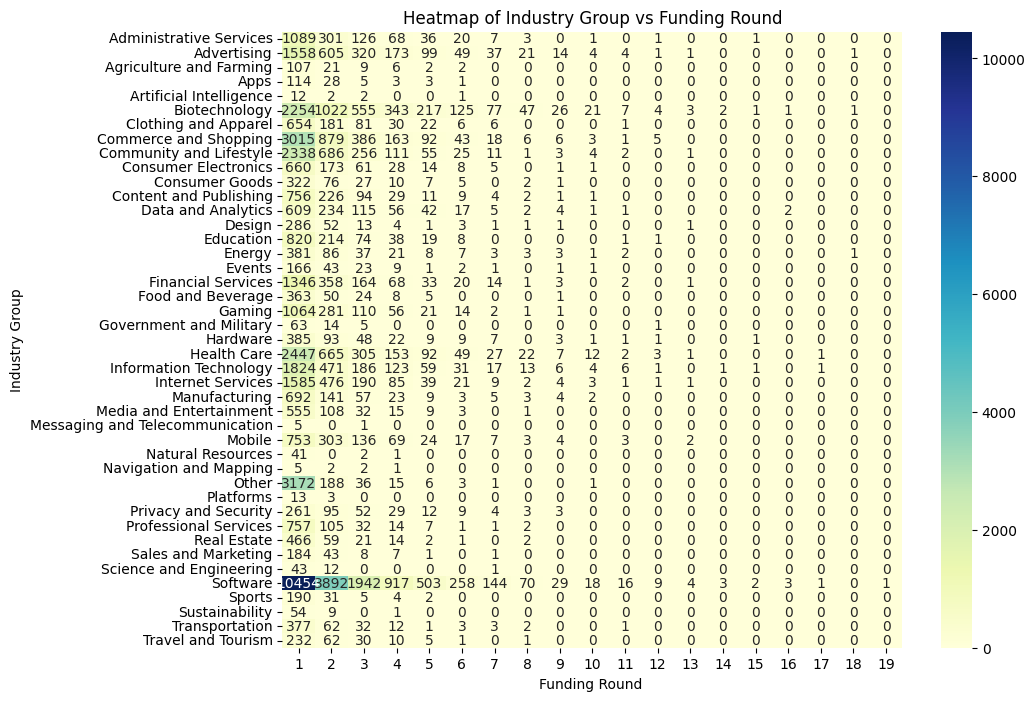

In [24]:
# Create a cross-tabulation between Industry_Group and funding_round_type
cross_tab = pd.crosstab(data_companies['Industry_Group'], data_companies['funding_rounds'])

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Heatmap of Industry Group vs Funding Round')
plt.xlabel('Funding Round ')
plt.ylabel('Industry Group')

plt.show()

In [25]:
data_rounds.head(5)

,company_permalink,company_name,company_category_list,company_country_code,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Industry_Group
0,/organization/-fame,#fame,Media,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-01-05,10000000.0,Media and Entertainment
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,0.0,Apps
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,seed,2014-03-01,700000.0,Apps
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,Other,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0,Software
4,/organization/0-6-com,0-6.com,Curated Web,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0,Internet Services


In [26]:
data_rounds.columns

Index(['company_permalink', 'company_name', 'company_category_list',
       'company_country_code', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd',
       'Industry_Group'],
      dtype='object')

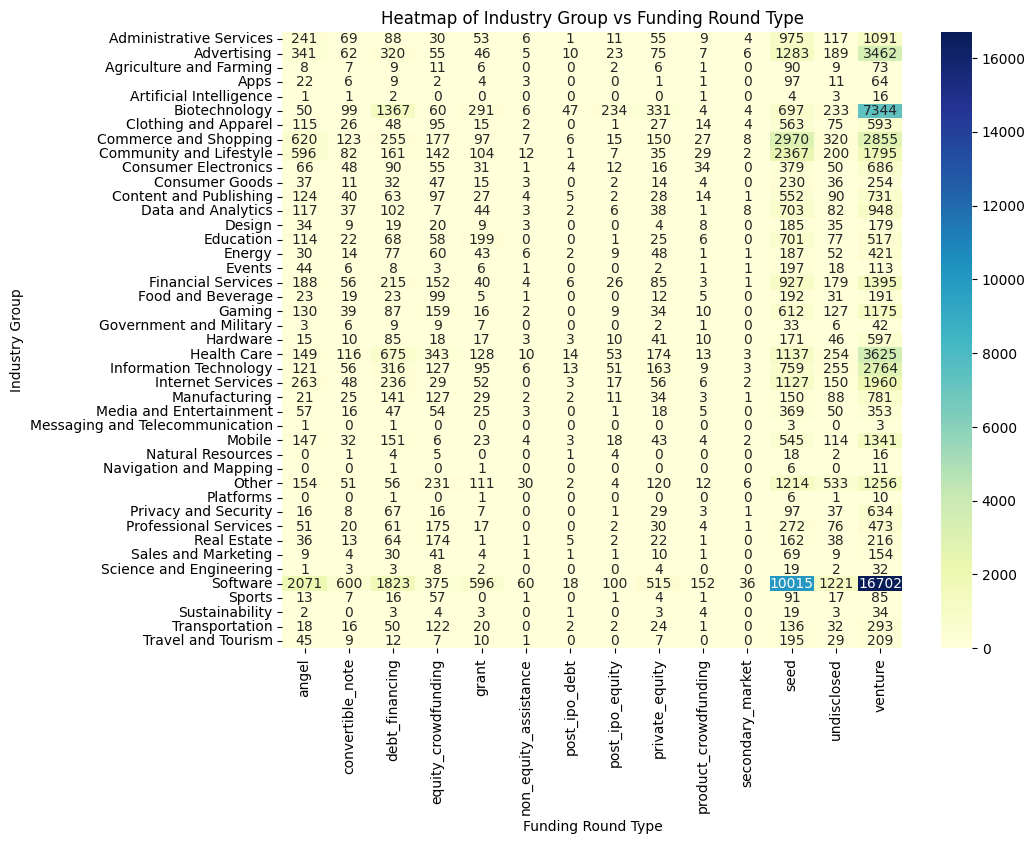

In [27]:
# Create a cross-tabulation between Industry_Group and funding_round_type
cross_tab = pd.crosstab(data_rounds['Industry_Group'], data_rounds['funding_round_type'])

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Heatmap of Industry Group vs Funding Round Type')
plt.xlabel('Funding Round Type')
plt.ylabel('Industry Group')

plt.show()

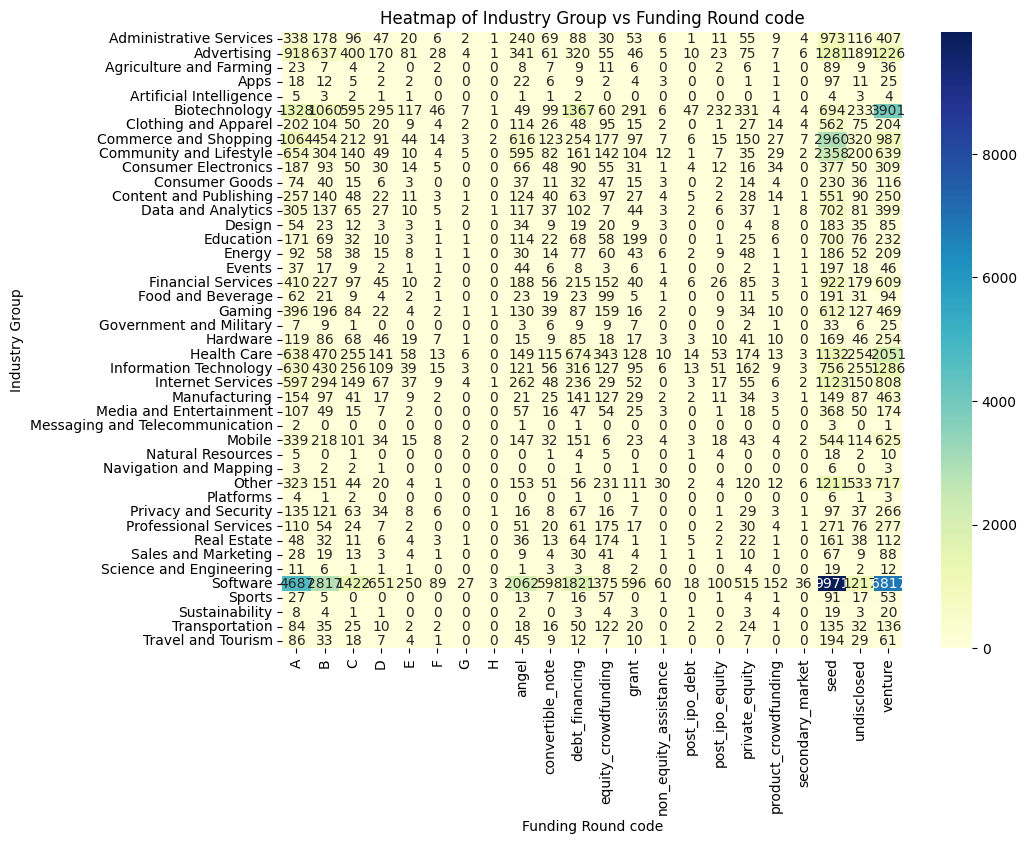

In [28]:
# Create a cross-tabulation between Industry_Group and funding_round_type
cross_tab = pd.crosstab(data_rounds['Industry_Group'], data_rounds['funding_round_code'])

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Heatmap of Industry Group vs Funding Round code')
plt.xlabel('Funding Round code')
plt.ylabel('Industry Group')

plt.show()

In [29]:
data_rounds.nunique()

company_permalink           66368
company_name                66103
company_category_list       27297
company_country_code          138
funding_round_permalink    114949
funding_round_type             14
funding_round_code             22
funded_at                    5033
raised_amount_usd           22095
Industry_Group                 43
dtype: int64

In [30]:
merged_data_1 = pd.merge(data_rounds, data_companies, left_on='company_permalink', right_on='permalink', how='left')
merged_data_1.head(5)

,company_permalink,company_name,company_category_list,company_country_code,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Industry_Group_x,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,Industry_Group_y
0,/organization/-fame,#fame,Media,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-01-05,10000000.0,Media and Entertainment,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,1.0,2015-01-05,2015-01-05,2015-01-05,Media and Entertainment
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,0.0,Apps,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,2.0,2014-09-04,2014-03-01,2014-10-14,Apps
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,seed,2014-03-01,700000.0,Apps,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,2.0,2014-09-04,2014-03-01,2014-10-14,Apps
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,Other,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0,Software,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,Other,1.0,2014-01-30,2014-01-30,2014-01-30,Software
4,/organization/0-6-com,0-6.com,Curated Web,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0,Internet Services,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,1.0,2007-01-01,2008-03-19,2008-03-19,Internet Services


In [31]:
merged_data_1.columns = merged_data_1.columns.str.replace(' ', '')
merged_data_1.columns = merged_data_1.columns.str.strip()
merged_data_1.columns = merged_data_1.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)
merged_data_1['homepage_url'] = merged_data_1['homepage_url'].fillna('Website not Provided')

In [32]:
columns_to_drop = ['permalink', 'name', 'category_list', 'funding_total_usd', 'country_code']
merged_data = merged_data_1.drop(columns=columns_to_drop)
merged_data

,company_permalink,company_name,company_category_list,company_country_code,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Industry_Group_x,homepage_url,status,funding_rounds,founded_at,first_funding_at,last_funding_at,Industry_Group_y
0,/organization/-fame,#fame,Media,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-01-05,10000000.0,Media and Entertainment,http://livfame.com,operating,1.0,2015-01-05,2015-01-05,2015-01-05,Media and Entertainment
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,0.0,Apps,http://www.qounter.com,operating,2.0,2014-09-04,2014-03-01,2014-10-14,Apps
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,seed,2014-03-01,700000.0,Apps,http://www.qounter.com,operating,2.0,2014-09-04,2014-03-01,2014-10-14,Apps
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,Other,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0,Software,http://oneofthem.jp,operating,1.0,2014-01-30,2014-01-30,2014-01-30,Software
4,/organization/0-6-com,0-6.com,Curated Web,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0,Internet Services,http://www.0-6.com,operating,1.0,2007-01-01,2008-03-19,2008-03-19,Internet Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,convertible_note,2014-03-01,41313.0,Software,http://www.zzzzapp.com,operating,4.0,2012-05-13,2011-11-01,2014-03-01,Software
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,seed,2013-05-01,32842.0,Software,http://www.zzzzapp.com,operating,4.0,2012-05-13,2011-11-01,2014-03-01,Software
114946,/organization/Ãeron,ÃERON,Other,Other,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,2014-08-01,0.0,Other,http://www.aeron.hu/,operating,1.0,2011-01-01,2014-08-01,2014-08-01,Other
114947,/organization/Ãasys-2,Ãasys,Consumer Electronics|Internet of Things|Teleco...,USA,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,seed,2015-01-01,18192.0,Consumer Electronics,http://www.oasys.io/,operating,1.0,2014-01-01,2015-01-01,2015-01-01,Consumer Electronics


In [33]:
data1 = merged_data
data1

,company_permalink,company_name,company_category_list,company_country_code,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Industry_Group_x,homepage_url,status,funding_rounds,founded_at,first_funding_at,last_funding_at,Industry_Group_y
0,/organization/-fame,#fame,Media,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-01-05,10000000.0,Media and Entertainment,http://livfame.com,operating,1.0,2015-01-05,2015-01-05,2015-01-05,Media and Entertainment
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,0.0,Apps,http://www.qounter.com,operating,2.0,2014-09-04,2014-03-01,2014-10-14,Apps
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,seed,2014-03-01,700000.0,Apps,http://www.qounter.com,operating,2.0,2014-09-04,2014-03-01,2014-10-14,Apps
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,Other,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0,Software,http://oneofthem.jp,operating,1.0,2014-01-30,2014-01-30,2014-01-30,Software
4,/organization/0-6-com,0-6.com,Curated Web,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0,Internet Services,http://www.0-6.com,operating,1.0,2007-01-01,2008-03-19,2008-03-19,Internet Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,convertible_note,2014-03-01,41313.0,Software,http://www.zzzzapp.com,operating,4.0,2012-05-13,2011-11-01,2014-03-01,Software
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,seed,2013-05-01,32842.0,Software,http://www.zzzzapp.com,operating,4.0,2012-05-13,2011-11-01,2014-03-01,Software
114946,/organization/Ãeron,ÃERON,Other,Other,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,2014-08-01,0.0,Other,http://www.aeron.hu/,operating,1.0,2011-01-01,2014-08-01,2014-08-01,Other
114947,/organization/Ãasys-2,Ãasys,Consumer Electronics|Internet of Things|Teleco...,USA,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,seed,2015-01-01,18192.0,Consumer Electronics,http://www.oasys.io/,operating,1.0,2014-01-01,2015-01-01,2015-01-01,Consumer Electronics


In [34]:
data1.isin([0]).sum()

company_permalink              0
company_name                   0
company_category_list          0
company_country_code           0
funding_round_permalink        0
funding_round_type             0
funding_round_code             0
funded_at                      0
raised_amount_usd          20405
Industry_Group_x               0
homepage_url                   0
status                         0
funding_rounds                 0
founded_at                     0
first_funding_at               0
last_funding_at                0
Industry_Group_y               0
dtype: int64

In [35]:
data1.nunique()

company_permalink           66368
company_name                66103
company_category_list       27297
company_country_code          138
funding_round_permalink    114949
funding_round_type             14
funding_round_code             22
funded_at                    5033
raised_amount_usd           22095
Industry_Group_x               43
homepage_url                61190
status                          4
funding_rounds                 19
founded_at                   4926
first_funding_at             4817
last_funding_at              4518
Industry_Group_y               43
dtype: int64

In [36]:
data1.count()

company_permalink          114949
company_name               114949
company_category_list      114949
company_country_code       114949
funding_round_permalink    114949
funding_round_type         114949
funding_round_code         114949
funded_at                  114949
raised_amount_usd          114949
Industry_Group_x           114949
homepage_url               114949
status                     114944
funding_rounds             114944
founded_at                 114944
first_funding_at           114944
last_funding_at            114944
Industry_Group_y           114944
dtype: int64

In [37]:
data1.isnull().sum().sort_values(ascending=False)/len(data)

Industry_Group_y           0.172414
last_funding_at            0.172414
first_funding_at           0.172414
founded_at                 0.172414
funding_rounds             0.172414
status                     0.172414
Industry_Group_x           0.000000
homepage_url               0.000000
company_permalink          0.000000
company_name               0.000000
funded_at                  0.000000
funding_round_code         0.000000
funding_round_type         0.000000
funding_round_permalink    0.000000
company_country_code       0.000000
company_category_list      0.000000
raised_amount_usd          0.000000
dtype: float64

In [38]:
data1.isnull().sum().sort_values(ascending=False) 


Industry_Group_y           5
last_funding_at            5
first_funding_at           5
founded_at                 5
funding_rounds             5
status                     5
Industry_Group_x           0
homepage_url               0
company_permalink          0
company_name               0
funded_at                  0
funding_round_code         0
funding_round_type         0
funding_round_permalink    0
company_country_code       0
company_category_list      0
raised_amount_usd          0
dtype: int64

In [39]:
data1[data1["Industry_Group_y"].isnull()]

,company_permalink,company_name,company_category_list,company_country_code,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Industry_Group_x,homepage_url,status,funding_rounds,founded_at,first_funding_at,last_funding_at,Industry_Group_y
43938,/organization/hermo,Hermo,E-Commerce,MYS,/funding-round/47dc3f84cd2e4e1ce9d6f308ffb306e8,venture,A,2015-10-14,2000000.0,Commerce and Shopping,Website not Provided,NaN,NaN,NaN,NaN,NaN,NaN
52663,/organization/keymetrics,Keymetrics,SaaS,USA,/funding-round/4b40da77dc5ad59897e6eec51fedca6e,venture,venture,2015-10-01,110000.0,Software,Website not Provided,NaN,NaN,NaN,NaN,NaN,NaN
52664,/organization/keymetrics,Keymetrics,SaaS,USA,/funding-round/ce76a3551f57c5341b0c4ffb1c738692,seed,seed,2014-08-29,150000.0,Software,Website not Provided,NaN,NaN,NaN,NaN,NaN,NaN
91447,/organization/snapp-2,Snapp Builder,Application Platforms|Development Platforms|Mo...,USA,/funding-round/cab79a9e1f4a39883b0ccb7592e87512,convertible_note,convertible_note,2014-08-06,60000.0,Apps,Website not Provided,NaN,NaN,NaN,NaN,NaN,NaN
91448,/organization/snapp-2,Snapp Builder,Application Platforms|Development Platforms|Mo...,USA,/funding-round/f2af8797fe144ce8c70460f2448be407,seed,seed,2015-09-01,300000.0,Apps,Website not Provided,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
data1[data1["company_name"] == 'Keymetrics'].sort_values(by='funded_at', ascending=False)

,company_permalink,company_name,company_category_list,company_country_code,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Industry_Group_x,homepage_url,status,funding_rounds,founded_at,first_funding_at,last_funding_at,Industry_Group_y
52663,/organization/keymetrics,Keymetrics,SaaS,USA,/funding-round/4b40da77dc5ad59897e6eec51fedca6e,venture,venture,2015-10-01,110000.0,Software,Website not Provided,NaN,NaN,NaN,NaN,NaN,NaN
52664,/organization/keymetrics,Keymetrics,SaaS,USA,/funding-round/ce76a3551f57c5341b0c4ffb1c738692,seed,seed,2014-08-29,150000.0,Software,Website not Provided,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
data1.dropna(subset=["Industry_Group_y"], inplace=True)

In [42]:
data1.isnull().sum().sort_values(ascending=False) 


company_permalink          0
Industry_Group_x           0
last_funding_at            0
first_funding_at           0
founded_at                 0
funding_rounds             0
status                     0
homepage_url               0
raised_amount_usd          0
company_name               0
funded_at                  0
funding_round_code         0
funding_round_type         0
funding_round_permalink    0
company_country_code       0
company_category_list      0
Industry_Group_y           0
dtype: int64

In [43]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114944 entries, 0 to 114948
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114944 non-null  object 
 1   company_name             114944 non-null  object 
 2   company_category_list    114944 non-null  object 
 3   company_country_code     114944 non-null  object 
 4   funding_round_permalink  114944 non-null  object 
 5   funding_round_type       114944 non-null  object 
 6   funding_round_code       114944 non-null  object 
 7   funded_at                114944 non-null  object 
 8   raised_amount_usd        114944 non-null  float64
 9   Industry_Group_x         114944 non-null  object 
 10  homepage_url             114944 non-null  object 
 11  status                   114944 non-null  object 
 12  funding_rounds           114944 non-null  float64
 13  founded_at               114944 non-null  object 
 14  firs

In [44]:
columns_to_drop_merge = ['company_category_list', 'funding_round_permalink', 'Industry_Group_y','homepage_url',]
data1 = data1.drop(columns=columns_to_drop_merge)



In [45]:
data1


,company_permalink,company_name,company_country_code,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Industry_Group_x,status,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,IND,venture,B,2015-01-05,10000000.0,Media and Entertainment,operating,1.0,2015-01-05,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,USA,venture,A,2014-10-14,0.0,Apps,operating,2.0,2014-09-04,2014-03-01,2014-10-14
2,/organization/-qounter,:Qounter,USA,seed,seed,2014-03-01,700000.0,Apps,operating,2.0,2014-09-04,2014-03-01,2014-10-14
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Other,venture,B,2014-01-30,3406878.0,Software,operating,1.0,2014-01-30,2014-01-30,2014-01-30
4,/organization/0-6-com,0-6.com,CHN,venture,A,2008-03-19,2000000.0,Internet Services,operating,1.0,2007-01-01,2008-03-19,2008-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,HRV,convertible_note,convertible_note,2014-03-01,41313.0,Software,operating,4.0,2012-05-13,2011-11-01,2014-03-01
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,HRV,seed,seed,2013-05-01,32842.0,Software,operating,4.0,2012-05-13,2011-11-01,2014-03-01
114946,/organization/Ãeron,ÃERON,Other,venture,A,2014-08-01,0.0,Other,operating,1.0,2011-01-01,2014-08-01,2014-08-01
114947,/organization/Ãasys-2,Ãasys,USA,seed,seed,2015-01-01,18192.0,Consumer Electronics,operating,1.0,2014-01-01,2015-01-01,2015-01-01


In [46]:
columns_to_convert = ['founded_at', 'first_funding_at', 'last_funding_at', 'funded_at']

data1.columns = data1.columns.str.replace(' ', '')
data1.columns = data1.columns.str.strip()
data1.columns = data1.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)
date_formats = {'founded_at': '%Y-%m-%d',
                'first_funding_at': '%Y-%m-%d',
                'last_funding_at': '%Y-%m-%d',
                'funded_at': '%Y-%m-%d'}
for column, format_str in date_formats.items():
    data1[column] = pd.to_datetime(data1[column], format=format_str, errors='coerce')
# Check for "NAT" values after conversion
nats_count = data1[columns_to_convert].isna().sum()
print(nats_count)

founded_at          5
first_funding_at    7
last_funding_at     0
funded_at           0
dtype: int64


In [47]:
data1[data1["founded_at"].isnull()]

,company_permalink,company_name,company_country_code,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Industry_Group_x,status,funding_rounds,founded_at,first_funding_at,last_funding_at
8441,/organization/atipica,Atipica,Other,seed,seed,2015-11-11,25000.0,Other,closed,1.0,NaT,2015-11-11,2015-11-11
38581,/organization/gamewheel,Gamewheel,DEU,seed,seed,2014-12-03,0.0,Advertising,operating,2.0,NaT,NaT,2014-12-03
43055,/organization/harvard-university,Harvard University,USA,grant,grant,2014-01-06,90000000.0,Education,operating,1.0,NaT,2014-01-06,2014-01-06
82901,/organization/rent2cash-com,rent2cash.com,Other,seed,seed,2014-06-09,40000.0,Apps,closed,1.0,NaT,2014-06-09,2014-06-09
102803,/organization/trinity-college-dublin,"Trinity College, Dublin",Other,grant,grant,2014-01-20,103198894.0,Education,operating,1.0,NaT,2014-01-20,2014-01-20


In [48]:
data1['founded_at'].fillna(data1['first_funding_at'], inplace=True)
data1['first_funding_at'].fillna(data1['founded_at'], inplace=True)

data1.dropna(subset=["founded_at"], inplace=True)

In [49]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114943 entries, 0 to 114948
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   company_permalink     114943 non-null  object        
 1   company_name          114943 non-null  object        
 2   company_country_code  114943 non-null  object        
 3   funding_round_type    114943 non-null  object        
 4   funding_round_code    114943 non-null  object        
 5   funded_at             114943 non-null  datetime64[ns]
 6   raised_amount_usd     114943 non-null  float64       
 7   Industry_Group_x      114943 non-null  object        
 8   status                114943 non-null  object        
 9   funding_rounds        114943 non-null  float64       
 10  founded_at            114943 non-null  datetime64[ns]
 11  first_funding_at      114943 non-null  datetime64[ns]
 12  last_funding_at       114943 non-null  datetime64[ns]
dtyp

In [50]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114943 entries, 0 to 114948
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   company_permalink     114943 non-null  object        
 1   company_name          114943 non-null  object        
 2   company_country_code  114943 non-null  object        
 3   funding_round_type    114943 non-null  object        
 4   funding_round_code    114943 non-null  object        
 5   funded_at             114943 non-null  datetime64[ns]
 6   raised_amount_usd     114943 non-null  float64       
 7   Industry_Group_x      114943 non-null  object        
 8   status                114943 non-null  object        
 9   funding_rounds        114943 non-null  float64       
 10  founded_at            114943 non-null  datetime64[ns]
 11  first_funding_at      114943 non-null  datetime64[ns]
 12  last_funding_at       114943 non-null  datetime64[ns]
dtyp

In [51]:
data1['time_between_founded_funded_at'] = (pd.to_datetime(data1['funded_at'], format='%m/%d/%y', errors="coerce") - pd.to_datetime(data1['founded_at'], errors="coerce")).dt.days

In [52]:
data1

,company_permalink,company_name,company_country_code,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Industry_Group_x,status,funding_rounds,founded_at,first_funding_at,last_funding_at,time_between_founded_funded_at
0,/organization/-fame,#fame,IND,venture,B,2015-01-05,10000000.0,Media and Entertainment,operating,1.0,2015-01-05,2015-01-05,2015-01-05,0
1,/organization/-qounter,:Qounter,USA,venture,A,2014-10-14,0.0,Apps,operating,2.0,2014-09-04,2014-03-01,2014-10-14,40
2,/organization/-qounter,:Qounter,USA,seed,seed,2014-03-01,700000.0,Apps,operating,2.0,2014-09-04,2014-03-01,2014-10-14,-187
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Other,venture,B,2014-01-30,3406878.0,Software,operating,1.0,2014-01-30,2014-01-30,2014-01-30,0
4,/organization/0-6-com,0-6.com,CHN,venture,A,2008-03-19,2000000.0,Internet Services,operating,1.0,2007-01-01,2008-03-19,2008-03-19,443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,HRV,convertible_note,convertible_note,2014-03-01,41313.0,Software,operating,4.0,2012-05-13,2011-11-01,2014-03-01,657
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,HRV,seed,seed,2013-05-01,32842.0,Software,operating,4.0,2012-05-13,2011-11-01,2014-03-01,353
114946,/organization/Ãeron,ÃERON,Other,venture,A,2014-08-01,0.0,Other,operating,1.0,2011-01-01,2014-08-01,2014-08-01,1308
114947,/organization/Ãasys-2,Ãasys,USA,seed,seed,2015-01-01,18192.0,Consumer Electronics,operating,1.0,2014-01-01,2015-01-01,2015-01-01,365


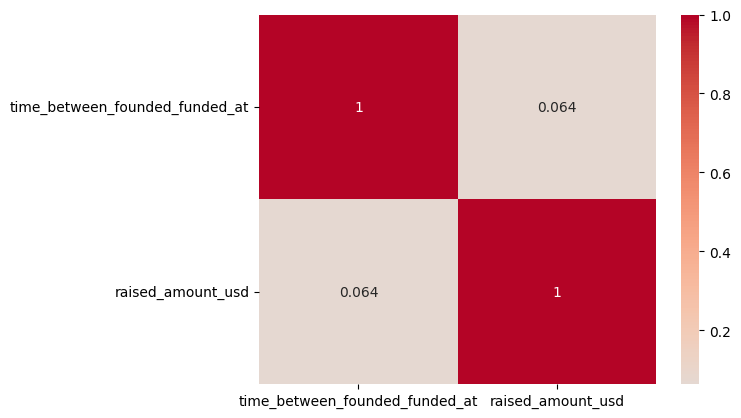

In [53]:
corr_matrix = data1[['time_between_founded_funded_at', 'raised_amount_usd']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

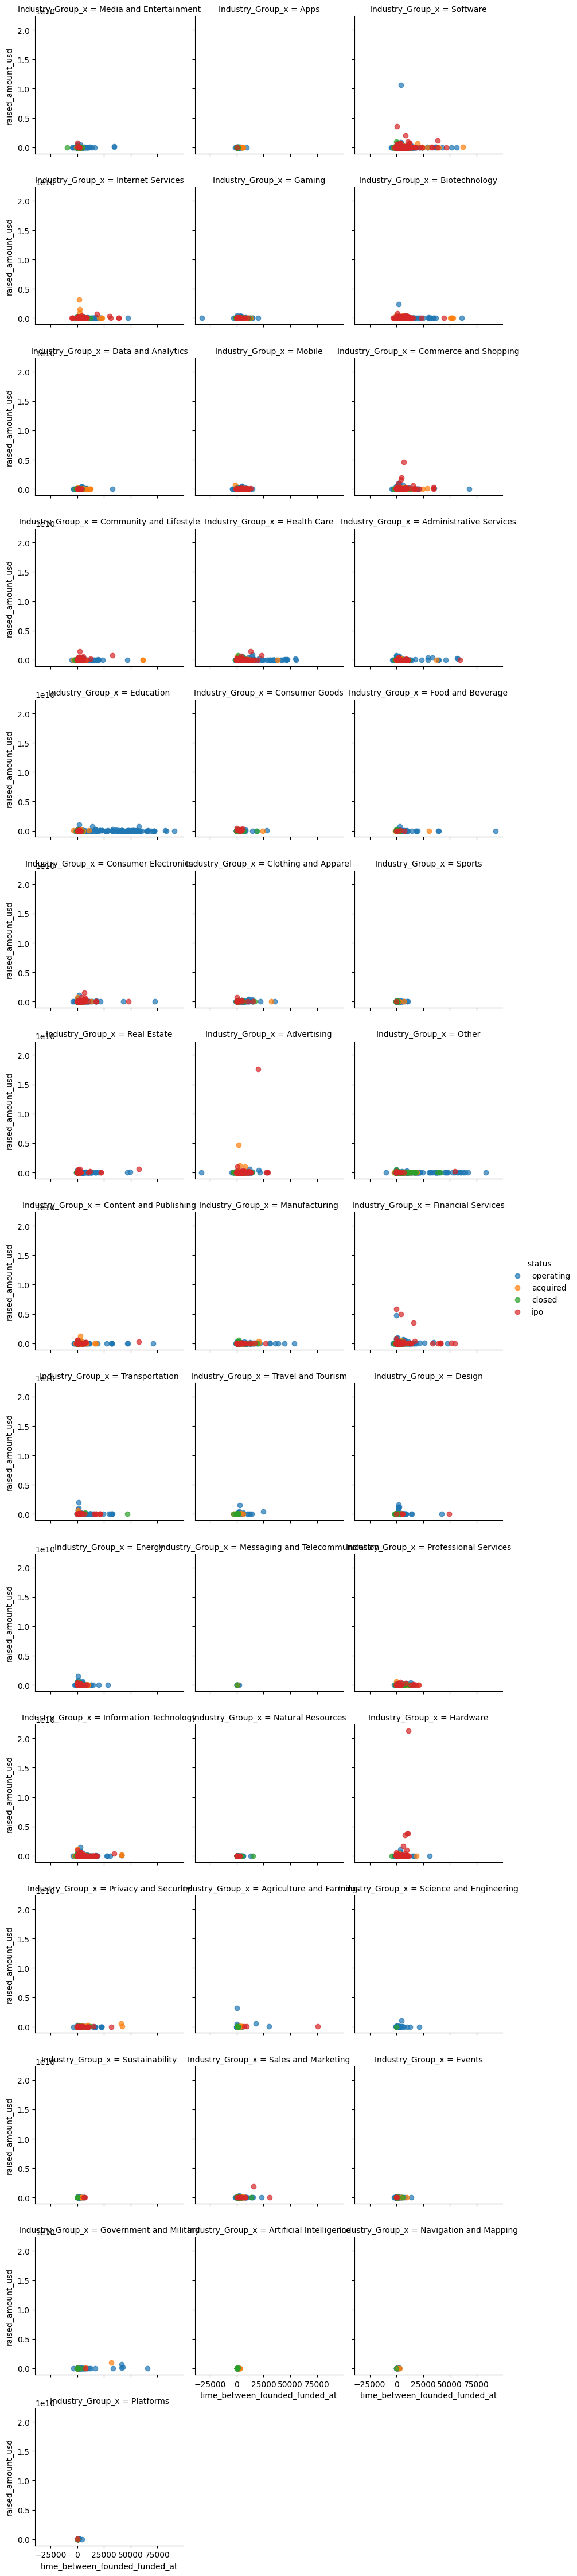

In [54]:
selected_columns = ['time_between_founded_funded_at', 'raised_amount_usd', 'status', 'Industry_Group_x']
selected_data = data1[selected_columns]

# Create a scatter plot with color-coded points
g = sns.FacetGrid(selected_data, col='Industry_Group_x', hue='status', col_wrap=3)
g.map(plt.scatter, 'time_between_founded_funded_at', 'raised_amount_usd', alpha=0.7)
g.add_legend()
plt.show()

In [55]:
data1.groupby("company_name")["status"].count().sort_values()

company_name
#BratPackStyle, LLC.          1
Orpro Therapeutics            1
Orreco                        1
Orsto                         1
Orsus Solutions               1
                             ..
Vocalocity                   17
Exagen Diagnostics           18
Semprius                     18
Quellan                      18
Solarflare Communications    19
Name: status, Length: 66099, dtype: int64

In [56]:
data1[data1["company_name"] == 'Solarflare Communications'].sort_values(by='funded_at', ascending=False)

,company_permalink,company_name,company_country_code,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Industry_Group_x,status,funding_rounds,founded_at,first_funding_at,last_funding_at,time_between_founded_funded_at
92207,/organization/solarflare,Solarflare Communications,USA,venture,venture,2015-01-05,30137941.0,Software,operating,19.0,2005-01-01,2005-02-28,2015-01-05,3656
92211,/organization/solarflare,Solarflare Communications,USA,venture,venture,2014-10-14,1100000.0,Software,operating,19.0,2005-01-01,2005-02-28,2015-01-05,3573
92210,/organization/solarflare,Solarflare Communications,USA,debt_financing,debt_financing,2014-09-17,75000.0,Software,operating,19.0,2005-01-01,2005-02-28,2015-01-05,3546
92213,/organization/solarflare,Solarflare Communications,USA,debt_financing,debt_financing,2014-04-06,2942719.0,Software,operating,19.0,2005-01-01,2005-02-28,2015-01-05,3382
92197,/organization/solarflare,Solarflare Communications,USA,venture,venture,2014-04-06,40000.0,Software,operating,19.0,2005-01-01,2005-02-28,2015-01-05,3382
92198,/organization/solarflare,Solarflare Communications,USA,debt_financing,debt_financing,2013-11-12,5000000.0,Software,operating,19.0,2005-01-01,2005-02-28,2015-01-05,3237
92209,/organization/solarflare,Solarflare Communications,USA,debt_financing,debt_financing,2013-09-16,2500000.0,Software,operating,19.0,2005-01-01,2005-02-28,2015-01-05,3180
92203,/organization/solarflare,Solarflare Communications,USA,debt_financing,debt_financing,2013-05-17,5000000.0,Software,operating,19.0,2005-01-01,2005-02-28,2015-01-05,3058
92199,/organization/solarflare,Solarflare Communications,USA,venture,venture,2013-01-02,22022208.0,Software,operating,19.0,2005-01-01,2005-02-28,2015-01-05,2923
92200,/organization/solarflare,Solarflare Communications,USA,debt_financing,debt_financing,2012-10-22,2500000.0,Software,operating,19.0,2005-01-01,2005-02-28,2015-01-05,2851


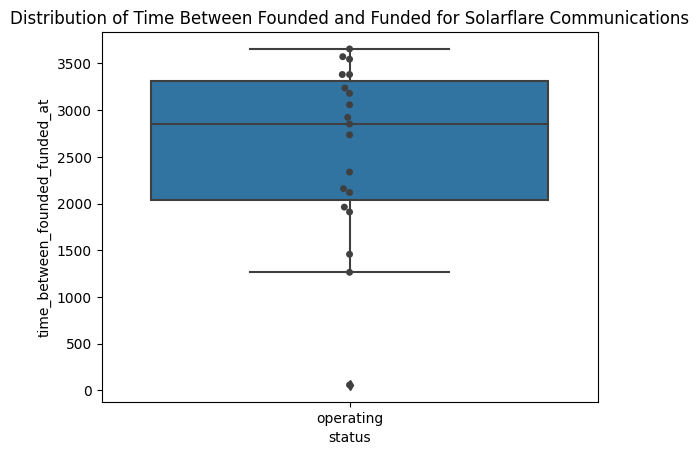

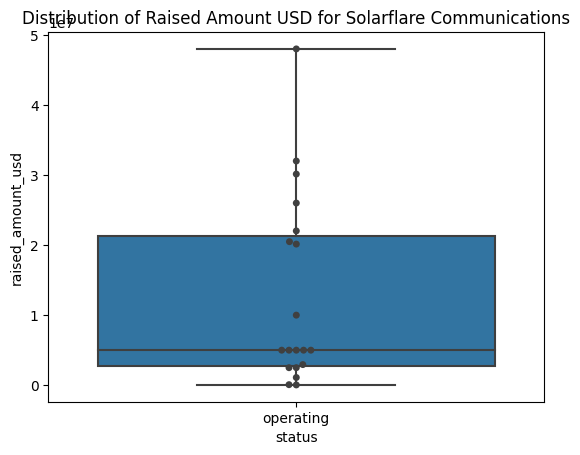

In [57]:
filtered_data = data1[data1["company_name"] == 'Solarflare Communications']

# Create box plot for 'time_between_founded_funded_at'
sns.boxplot(x='status', y='time_between_founded_funded_at', data=filtered_data)
sns.swarmplot(x='status', y='time_between_founded_funded_at', data=filtered_data, color=".25")
plt.title('Distribution of Time Between Founded and Funded for Solarflare Communications')
plt.show()

# Create box plot for 'raised_amount_usd'
sns.boxplot(x='status', y='raised_amount_usd', data=filtered_data)
sns.swarmplot(x='status', y='raised_amount_usd', data=filtered_data, color=".25")
plt.title('Distribution of Raised Amount USD for Solarflare Communications')
plt.show()

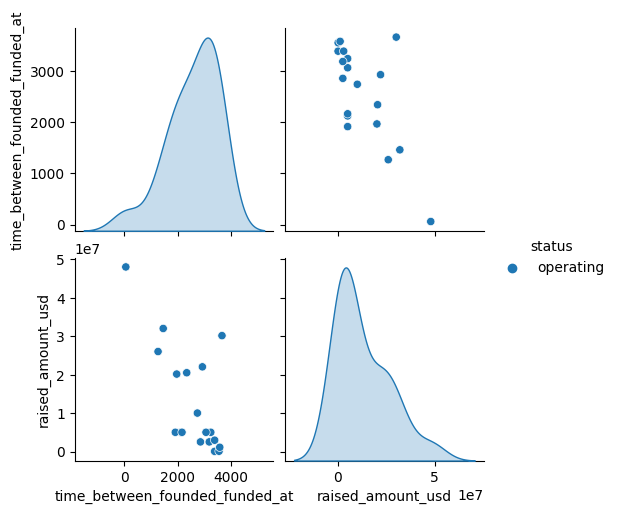

In [58]:
filtered_data = data1[data1["company_name"] == 'Solarflare Communications']

# Select relevant columns
selected_columns = ['time_between_founded_funded_at', 'raised_amount_usd', 'status']
filtered_data_selected = filtered_data[selected_columns]

# Create a pair plot
sns.pairplot(filtered_data_selected, hue='status')
plt.show()

In [59]:
data1[data1["company_name"] == 'Solarflare Communications'].agg({'raised_amount_usd': ['sum', 'mean', 'max']})

,raised_amount_usd
sum,2.429488e+08
mean,1.278678e+07
max,4.800000e+07


In [60]:
statuses = data1.groupby("company_name")["status"].nunique()

In [61]:
statuses[statuses > 1]

company_name
3DIVAZ      2
Adtena      2
Aptible     2
Archive     2
Ardian      2
           ..
Ventrix     2
Vessel      2
ViaCell     2
Wonder      2
Wormhole    2
Name: status, Length: 88, dtype: int64

In [62]:
rounds = data1.groupby("company_name")["funding_round_code"].nunique()
rounds

company_name
#BratPackStyle, LLC.         1
#HASHOFF                     1
#fame                        1
#waywire                     1
&TV Communications           1
                            ..
Ä°Å kutusu video ajansÄ±    1
Ðnso.fm                     1
âShwrÃ¼m                   1
âWestEd                    1
åç¥é©¬ ChiShenMa          1
Name: funding_round_code, Length: 66099, dtype: int64

In [63]:
#rounds[rounds > 0].count()
rounds[(rounds > 0) & (rounds == 1)].count()


47553

In [64]:
acquire = data1.groupby("company_name")["status"].nunique()
acquire

company_name
#BratPackStyle, LLC.         1
#HASHOFF                     1
#fame                        1
#waywire                     1
&TV Communications           1
                            ..
Ä°Å kutusu video ajansÄ±    1
Ðnso.fm                     1
âShwrÃ¼m                   1
âWestEd                    1
åç¥é©¬ ChiShenMa          1
Name: status, Length: 66099, dtype: int64

In [65]:
acquire[acquire > 1]

company_name
3DIVAZ      2
Adtena      2
Aptible     2
Archive     2
Ardian      2
           ..
Ventrix     2
Vessel      2
ViaCell     2
Wonder      2
Wormhole    2
Name: status, Length: 88, dtype: int64

In [66]:
data1[data1["company_name"] == 'picoChip']['funding_round_code'].value_counts()

debt_financing    1
C                 1
venture           1
D                 1
B                 1
E                 1
A                 1
Name: funding_round_code, dtype: int64

In [67]:
data1[data1["company_name"] == '3DIVAZ']

,company_permalink,company_name,company_country_code,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Industry_Group_x,status,funding_rounds,founded_at,first_funding_at,last_funding_at,time_between_founded_funded_at
477,/organization/3divaz-2,3DIVAZ,Other,seed,seed,2015-11-01,202250.0,Other,closed,1.0,2014-07-01,2015-11-01,2015-11-01,488
478,/organization/3divaz-3,3DIVAZ,CHE,seed,seed,2015-11-01,202250.0,Other,operating,1.0,2014-07-01,2015-11-01,2015-11-01,488


In [68]:
data1[data1['time_between_founded_funded_at'] < 0].groupby('funding_round_type').size()

funding_round_type
angel                     541
convertible_note           60
debt_financing             73
equity_crowdfunding       307
grant                     144
non_equity_assistance      11
post_ipo_equity             2
private_equity             33
product_crowdfunding       19
secondary_market            1
seed                     2114
undisclosed               152
venture                   765
dtype: int64

In [69]:
data1.groupby('company_country_code')['company_name'].nunique().sort_values(ascending=False)

company_country_code
USA      37487
Other     6949
GBR       3684
CAN       1925
IND       1596
         ...  
IRN          1
OMN          1
SOM          1
JEY          1
QAT          1
Name: company_name, Length: 138, dtype: int64

In [70]:
country = pd.read_csv('/Users/aamruth/Downloads/country.csv') # uploading dataset to map countyr code to continent
country = country[['Continent_Name', 'Three_Letter_Country_Code', 'Country_Name']]
country = country.dropna(how='any',axis=0) 
country.isnull().sum() # checking if there is null values

Continent_Name               0
Three_Letter_Country_Code    0
Country_Name                 0
dtype: int64

In [71]:
df1 = data1.merge(country, left_on='company_country_code', right_on='Three_Letter_Country_Code')
# merging both datasets and creating new column called continent
df1.columns

Index(['company_permalink', 'company_name', 'company_country_code',
       'funding_round_type', 'funding_round_code', 'funded_at',
       'raised_amount_usd', 'Industry_Group_x', 'status', 'funding_rounds',
       'founded_at', 'first_funding_at', 'last_funding_at',
       'time_between_founded_funded_at', 'Continent_Name',
       'Three_Letter_Country_Code', 'Country_Name'],
      dtype='object')

In [72]:
df1.groupby(by = ['Continent_Name'])['company_permalink'].count() #number of companies in each continent


Continent_Name
Africa             365
Asia              9861
Europe           17532
North America    75734
Oceania            920
South America     1712
Name: company_permalink, dtype: int64

In [73]:
columns_to_drop_company_conti = ['Three_Letter_Country_Code', 'Country_Name']
df1.drop(columns=columns_to_drop_company_conti, inplace=True)


In [74]:
df1

,company_permalink,company_name,company_country_code,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Industry_Group_x,status,funding_rounds,founded_at,first_funding_at,last_funding_at,time_between_founded_funded_at,Continent_Name
0,/organization/-fame,#fame,IND,venture,B,2015-01-05,10000000.0,Media and Entertainment,operating,1.0,2015-01-05,2015-01-05,2015-01-05,0,Asia
1,/organization/1000lookz,1000Lookz,IND,venture,venture,2013-07-22,0.0,Consumer Goods,operating,1.0,2008-01-01,2013-07-22,2013-07-22,2029,Asia
2,/organization/1click,1CLICK,IND,seed,seed,2014-01-26,0.0,Messaging and Telecommunication,acquired,1.0,2012-11-01,2014-01-26,2014-01-26,451,Asia
3,/organization/21diamonds-india,21Diamonds,IND,venture,C,2012-11-15,6369507.0,Commerce and Shopping,operating,1.0,2012-06-01,2012-11-15,2012-11-15,167,Asia
4,/organization/247-learning-private,24x7 Learning,IND,venture,venture,2007-11-06,4000000.0,Software,operating,1.0,2001-01-01,2007-11-06,2007-11-06,2500,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106119,/organization/tappress,TapPress,SOM,seed,seed,2010-10-10,2000000.0,Consumer Electronics,closed,1.0,2010-10-10,2010-10-10,2010-10-10,0,Africa
106120,/organization/unyqe,Unyqe,SYC,seed,seed,2011-10-23,35000.0,Software,closed,1.0,2011-11-10,2011-10-23,2011-10-23,-18,Africa
106121,/organization/viadedo,Viadedo,PRY,seed,seed,2014-12-23,25000.0,Transportation,operating,1.0,2013-04-01,2014-12-23,2014-12-23,631,South America
106122,/organization/volubill,VoluBill,MAF,venture,C,2005-01-17,14403184.0,Software,acquired,2.0,2001-01-01,2005-01-17,2007-09-25,1477,North America


In [75]:
csv_file_path = '../data/Startup-newdata/02_data.csv'
df1.to_csv(csv_file_path, index=False) 

In [76]:
mean_time_between = df1.groupby('funding_rounds')['time_between_founded_funded_at'].median()
mean_time_between

funding_rounds
1.0      304.0
2.0      619.0
3.0      850.0
4.0     1056.0
5.0     1277.5
6.0     1461.0
7.0     1628.0
8.0     1858.5
9.0     1939.5
10.0    2289.0
11.0    2079.5
12.0    2177.0
13.0    2115.0
14.0    2359.0
15.0    2600.0
16.0    1929.0
17.0    1766.0
18.0    3025.0
19.0    2851.0
Name: time_between_founded_funded_at, dtype: float64

In [77]:
mean_diff = mean_time_between.diff()
mean_diff

funding_rounds
1.0        NaN
2.0      315.0
3.0      231.0
4.0      206.0
5.0      221.5
6.0      183.5
7.0      167.0
8.0      230.5
9.0       81.0
10.0     349.5
11.0    -209.5
12.0      97.5
13.0     -62.0
14.0     244.0
15.0     241.0
16.0    -671.0
17.0    -163.0
18.0    1259.0
19.0    -174.0
Name: time_between_founded_funded_at, dtype: float64

In [78]:
df1.columns

Index(['company_permalink', 'company_name', 'company_country_code',
       'funding_round_type', 'funding_round_code', 'funded_at',
       'raised_amount_usd', 'Industry_Group_x', 'status', 'funding_rounds',
       'founded_at', 'first_funding_at', 'last_funding_at',
       'time_between_founded_funded_at', 'Continent_Name'],
      dtype='object')

In [79]:
df1_software = df1[df1["Industry_Group_x"] == 'Software']

venture                  16117
seed                      9165
angel                     1913
debt_financing            1775
undisclosed               1150
grant                      553
convertible_note           549
private_equity             492
equity_crowdfunding        365
product_crowdfunding       137
post_ipo_equity             89
non_equity_assistance       52
secondary_market            34
post_ipo_debt               18
Name: funding_round_type, dtype: int64

<AxesSubplot:xlabel='time_between_founded_funded_at', ylabel='raised_amount_usd'>

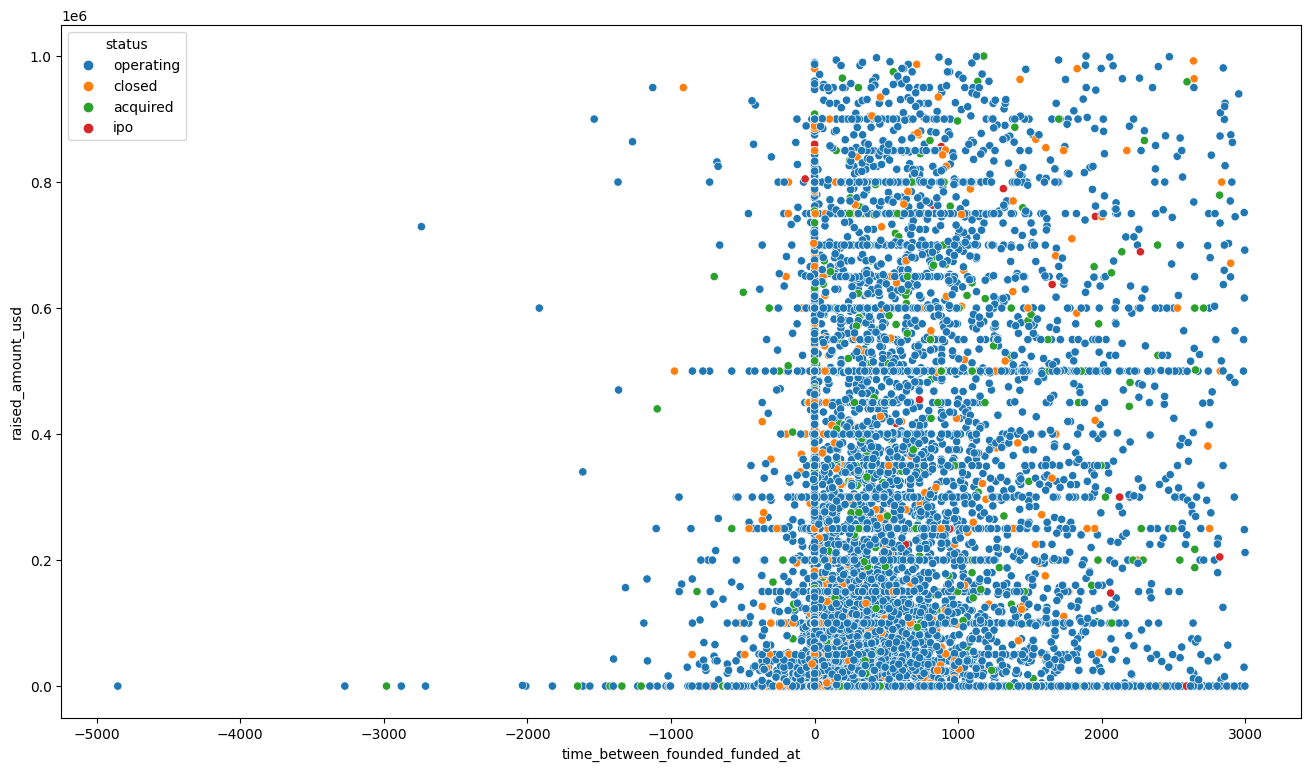

In [80]:
plt.figure(figsize=(16,9))
filtered = df1_software[(df1_software["time_between_founded_funded_at"] < 3000) & (df1_software["raised_amount_usd"] < 1e6)]
filtered = filtered[filtered['funding_round_type'].isin(['venture','seed','angel','grant'])]
sns.scatterplot(data = filtered, x = "time_between_founded_funded_at", y = "raised_amount_usd", hue='status')


In [81]:
flitered = filtered[filtered['funding_round_type'].isin(['venture','seed','angel','grant'])]
flitered['funding_round_type'].unique()

array(['angel', 'seed', 'venture', 'grant'], dtype=object)

In [82]:
final_status = df1_software.sort_values('funded_at', ascending=False).groupby('company_name')['status'].last()

company_name
(In)Touch Network    operating
.Club Domains           closed
//Staq.io             acquired
004 Technologies     operating
1-4 All              operating
                       ...    
zweitgeist           operating
zwoor.com            operating
Âµ-GPS Optics        operating
Ðnso.fm             operating
âShwrÃ¼m           operating
Name: status, Length: 16875, dtype: object

In [83]:
final_status.name = 'final status'

In [84]:
df1_software = df1_software.join(final_status, on='company_name')

In [85]:
funds_per_round = df1_software.groupby(by=['final status', 'funding_round_code']).agg(
    {'time_between_founded_funded_at': "mean", "raised_amount_usd": 'mean'}
)

In [86]:
funds_per_round = df1_software.groupby(by=['final status', 'funding_round_code']).agg(
    {'time_between_founded_funded_at': "mean", "raised_amount_usd": 'mean'}
)
funds_per_round

time_between_founded_funded_at  \
final status funding_round_code                                     
acquired     A                                         939.576769   
             B                                        1466.587227   
             C                                        1858.173333   
             D                                        2287.101064   
             E                                        2801.071429   
...                                                           ...   
operating    product_crowdfunding                     1048.372093   
             secondary_market                         3066.153846   
             seed                                      542.808280   
             undisclosed                              1671.994658   
             venture                                  1933.807473   

                                   raised_amount_usd  
final status funding_round_code                       
acquired     A                          5.455073e+06  
             B                          1.113737e+07  
             C                          1.336853e+07  
             D                          1.533435e+07  
             E                          1.469467e+07  
...                                              ...  
operating    product_crowdfunding       1.508776e+06  
             secondary_market           2.198846e+07  
             seed                       6.154489e+05  
             undisclosed                1.311977e+06  
             venture                    4.224515e+06  

[82 rows x 2 columns]

<AxesSubplot:xlabel='time_between_founded_funded_at', ylabel='raised_amount_usd'>

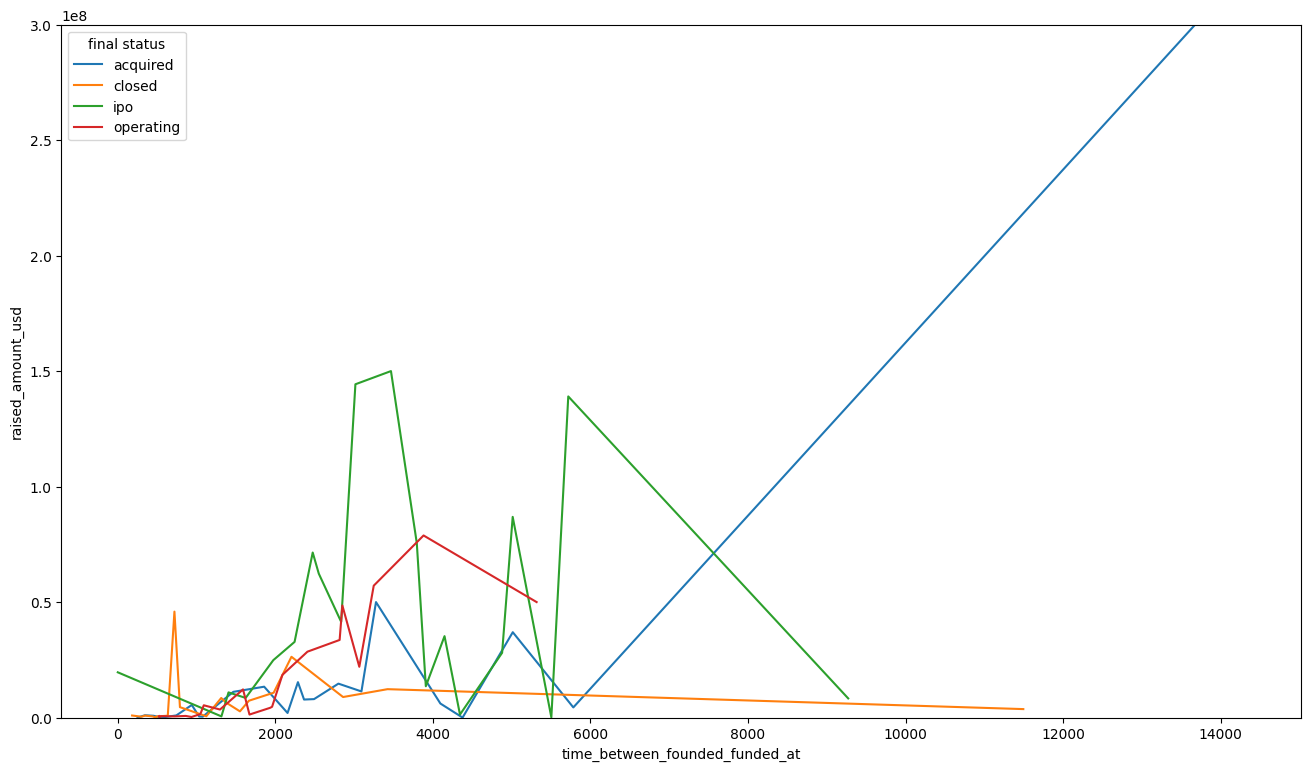

In [87]:
# Select the data for final status = acquired
acquired_data = funds_per_round.loc['acquired']

In [88]:
#funds_per_round.loc['acquired'].sort_values("time_between_founded_funded_at", ascending=True)['raised_amount_usd'].cumsum().plot()
#funds_per_round.loc['ipo'].sort_values("time_between_founded_funded_at")['raised_amount_usd'].cumsum().plot()

In [89]:
acquired_cumsum = funds_per_round.loc['acquired'] \
    .sort_values("time_between_founded_funded_at", ascending=True)['raised_amount_usd'].cumsum()

In [90]:
#funds_per_round.loc['closed'].sort_values("time_between_founded_funded_at", ascending=True)['raised_amount_usd'].cumsum().plot()

In [91]:
#closed_cumsum = funds_per_round.loc['closed'] \
 #   .sort_values("time_between_founded_funded_at", ascending=True)['raised_amount_usd'].cumsum()
#ipo_cumsum = funds_per_round.loc['ipo'] \
 #   .sort_values("time_between_founded_funded_at", ascending=True)['raised_amount_usd'].cumsum()

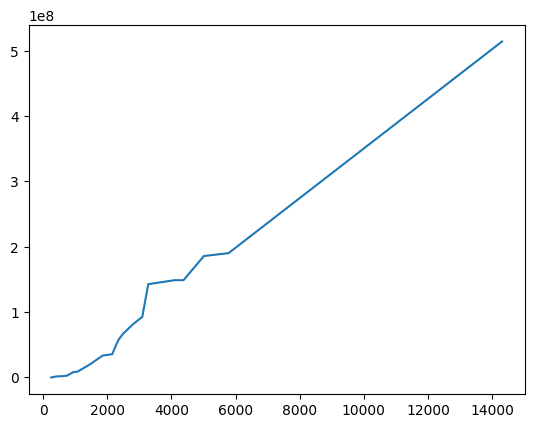

In [92]:
plt.plot(funds_per_round.loc['acquired', 'time_between_founded_funded_at'].sort_values(), acquired_cumsum)
#plt.plot(funds_per_round.loc['closed', 'time_between_founded_funded_at'].sort_values(), closed_cumsum)
#plt.plot(funds_per_round.loc['ipo', 'time_between_founded_funded_at'].sort_values(), ipo_cumsum)

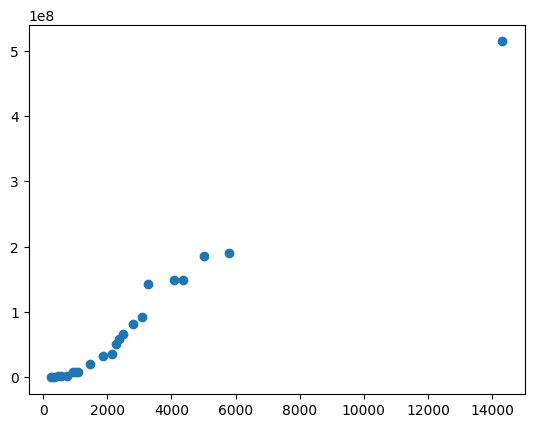

In [93]:
plt.scatter(funds_per_round.loc['acquired', 'time_between_founded_funded_at'].sort_values(), acquired_cumsum)

In [94]:
funds_per_round = df1_software.groupby(by=['final status', 'funding_rounds']).agg(
    {"raised_amount_usd": 'median'}
)
funds_per_round

raised_amount_usd
final status funding_rounds                   
acquired     1.0                     2590000.0
             2.0                     4000000.0
             3.0                     4100000.0
             4.0                     4000000.0
             5.0                     5000000.0
             6.0                     4083344.0
             7.0                     6292200.0
             8.0                     6320189.5
             9.0                     2500000.0
             10.0                    7750000.0
             11.0                    2600000.0
             17.0                    1000000.0
closed       1.0                      280656.0
             2.0                     1069585.0
             3.0                     1400000.0
             4.0                     2000000.0
             5.0                     6500000.0
             6.0                     3317500.0
             7.0                     1000000.0
             8.0                     1492980.5
             9.0                      250000.0
             11.0                      50000.0
ipo          1.0                     6641523.5
             2.0                     5000000.0
             3.0                     8449999.5
             4.0                     6714300.0
             5.0                     9550000.0
             6.0                     8950000.0
             7.0                     6825000.0
             8.0                    12000000.0
             9.0                    27500000.0
             10.0                    1028005.5
             11.0                   13100000.0
             12.0                    1495396.0
operating    1.0                      300000.0
             2.0                      647657.0
             3.0                     1000000.0
             4.0                     1250000.0
             5.0                     2000000.0
             6.0                     2000000.0
             7.0                     2000000.0
             8.0                     3400000.0
             9.0                     3000000.0
             10.0                    3757648.0
             11.0                    3931779.5
             12.0                     517479.5
             13.0                    4200000.0
             14.0                    2475804.0
             15.0                    1368338.5
             16.0                     395567.5
             19.0                    5000000.0

<AxesSubplot:xlabel='funding_rounds', ylabel='raised_amount_usd'>

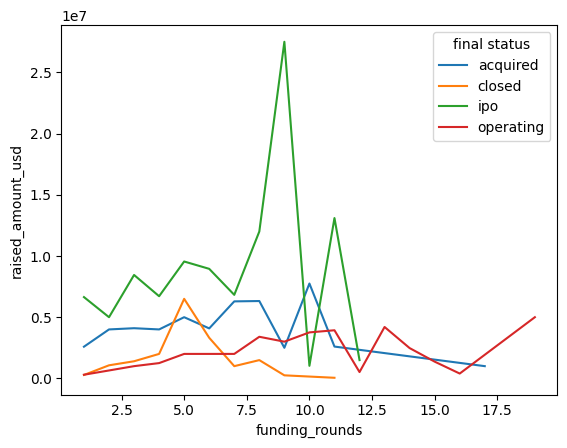

In [95]:
sns.lineplot(data=funds_per_round, x='funding_rounds', y='raised_amount_usd', hue='final status')

In [96]:
# Extract the time between founded and funded and raised amount data
time_data = acquired_data['time_between_founded_funded_at']
raised_data = acquired_data['raised_amount_usd']

In [97]:
time_data.index

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'angel', 'convertible_note',
       'debt_financing', 'equity_crowdfunding', 'grant',
       'non_equity_assistance', 'post_ipo_debt', 'post_ipo_equity',
       'private_equity', 'product_crowdfunding', 'secondary_market', 'seed',
       'undisclosed', 'venture'],
      dtype='object', name='funding_round_code')

In [170]:
raised_data

funding_round_code
A                        5.455073e+06
B                        1.113737e+07
C                        1.336853e+07
D                        1.533435e+07
E                        1.469467e+07
F                        1.131402e+07
G                        6.082659e+06
H                        4.400000e+06
angel                    9.352487e+05
convertible_note         4.926998e+05
debt_financing           7.993410e+06
equity_crowdfunding      0.000000e+00
grant                    3.984414e+05
non_equity_assistance    0.000000e+00
post_ipo_debt            5.000000e+07
post_ipo_equity          3.236982e+08
private_equity           3.695754e+07
product_crowdfunding     9.970000e+05
secondary_market         0.000000e+00
seed                     7.725934e+05
undisclosed              1.991835e+06
venture                  7.808184e+06
Name: raised_amount_usd, dtype: float64

In [98]:
plt.scatter(funds_per_round.loc['acquired', 'time_between_founded_funded_at'].sort_values(), acquired_cumsum)
plt.xlim((0, 7000))

KeyError: 'time_between_founded_funded_at'